In [3]:
# WeatherPy

#### Note
# Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint

# import API key
from api_keys import weather_api_key

# incorporated citipy to determine city based on lat and long
from citipy import citipy

# output file (csv)
outputDataFile = "Output/cities.csv"

# range of lat and long
lat_range = (-90, 90)
lng_range = (-180, 180)




In [4]:
## Generate Cities List

lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique add to cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

615

In [5]:
cities[0:15]

['fengrun',
 'severo-kurilsk',
 'ushuaia',
 'emerald',
 'marsh harbour',
 'teacapan',
 'puerto ayora',
 'aviles',
 'gornopravdinsk',
 'yerbogachen',
 'albany',
 'leningradskiy',
 'saleaula',
 'deputatskiy',
 'provideniya']

In [ ]:
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=486a3f0a342100df108bae3ce4d66f0e


In [7]:
#Initiate counter for city number below
number = 1

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []


#Loop through each city, extract required items, and print result
print('------------------------------')
print('Start of Records')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
Start of Records
------------------------------
City number 1 of 615 complete. | Added fengrun
City number 2 of 615 complete. | Added severo-kurilsk
City number 3 of 615 complete. | Added ushuaia
City number 4 of 615 complete. | Added emerald
City number 5 of 615 complete. | Added marsh harbour
City number 6 of 615 complete. | Added teacapan
City number 7 of 615 complete. | Added puerto ayora
City number 8 of 615 complete. | Added aviles
City number 9 of 615 complete. | Added gornopravdinsk
City number 10 of 615 complete. | Added yerbogachen
City number 11 of 615 complete. | Added albany
City number 12 of 615 complete. | Added leningradskiy
Missing data in city number 13 of 615. | Skipping saleaula
City number 14 of 615 complete. | Added deputatskiy
City number 15 of 615 complete. | Added provideniya
City number 16 of 615 complete. | Added ixtapa
City number 17 of 615 complete. | Added hithadhoo
City number 18 of 615 complete. | Added mataura
City number 

In [11]:
len(city_data)

13

In [ ]:
### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    
    "City": city_name, 
    "Latitude": lat, 
    "Longitude": lng,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": clouds, 
    "Wind Speed": wind,
   
    
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          573
Latitude      573
Longitude     573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
dtype: int64

In [48]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head(5)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,-0.60,73.08,81.99,76,55,10.65
1,Saint-Philippe,-21.36,55.77,70.57,57,48,3.36
2,Bluff,-46.60,168.33,50.00,63,0,4.00
3,Iqaluit,63.75,-68.51,37.20,69,40,5.82
4,Rikitea,-23.12,-134.97,73.63,86,78,13.00


In [16]:
#stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [16]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature'])
plt.title(f'City Latitude vs. Temperature {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

KeyError: 'Temperature'

In [ ]:
## Latitude vs. Humidity Plot

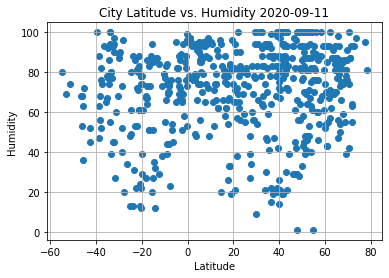

In [15]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'])
plt.title(f'City Latitude vs. Humidity {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

## Latitude vs. Cloudiness Plot

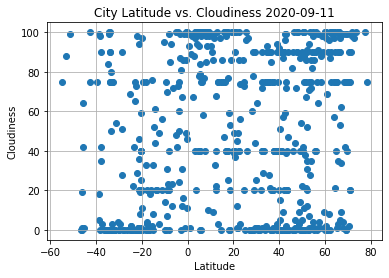

In [17]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

## Latitude vs. Wind Speed Plot

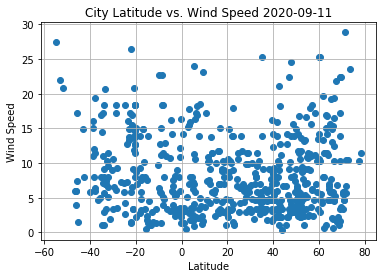

In [18]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


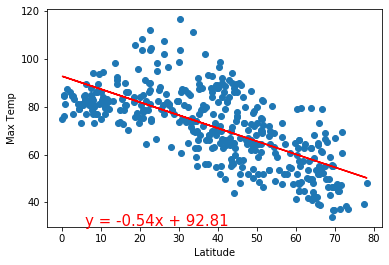

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


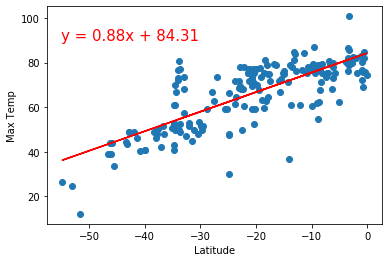

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


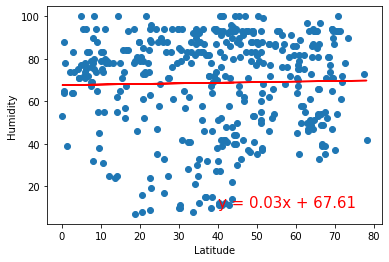

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


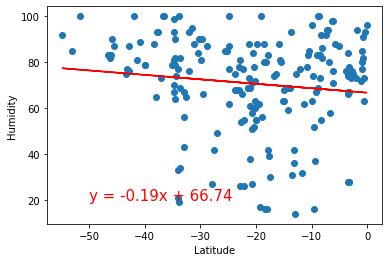

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


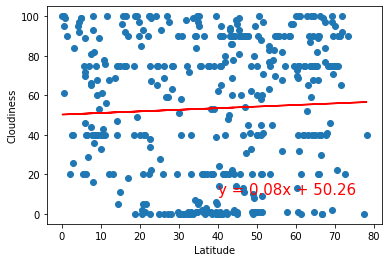

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


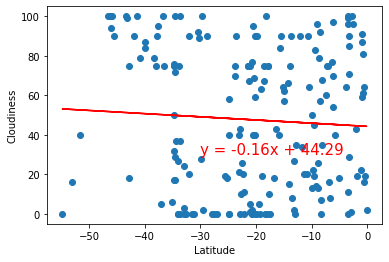

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


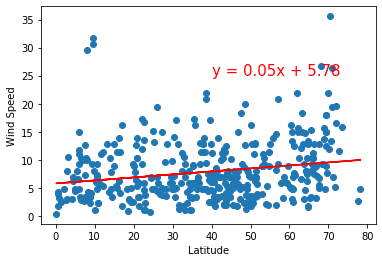

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


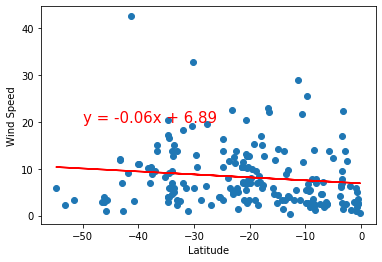